# Import libraries

Although most of the libraries are imported by the respective helper files but importing them here would help in debugging.

In [1]:
import pandas as pd
import numpy as np
import time

import sklearn
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# The kernel need not be refreshed if a custom helper file (included in the next cell) is updated
%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Import the custom helper files

In [2]:
from algorithm_helpers import *
from visualisation_helpers import *

In [3]:
#Optional
import warnings
warnings.filterwarnings('ignore') # Logistic regression does not converge and the warnings are pretty long

# Load and display the dataset

In [4]:
path = '../../datasets/vehicles.csv' # path to dataset
df = pd.read_csv(path)

In [5]:
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


# Basic exploratory analysis

In [6]:
df.describe()
# We observe that the data is clean and there are no null values or extreme outliers

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


Let us check if the distribution of classes is even by finding the counts of each class.

In [7]:
print('Number of Opels:', sum(df.Class == 'opel'))
print('Number of Buses:', sum(df.Class == 'bus'))
print('Number of Saabs:', sum(df.Class == 'saab'))
print('Number of Vans:', sum(df.Class == 'van'))

Number of Opels: 212
Number of Buses: 218
Number of Saabs: 217
Number of Vans: 199


Pretty evenly distributed. Looks good!

## Pair plot

The pairplot is now used to check for any obvious correlation among features. The diagonal plots show the distribution of that particular feature with respect to the 4 vehicle types:
* Blue - Opel
* Orange - Bus
* Green - Saab
* Red - Van

We can get some well-defined observations from this, like:
* The compactness of a van is much more than the other vehicles
* The maximum length aspect ratio of an Opel is very high

There are some more observations that can be made but I am skipping them for now as I do not intend to do feature engineering right now (I will try that in the next few days).

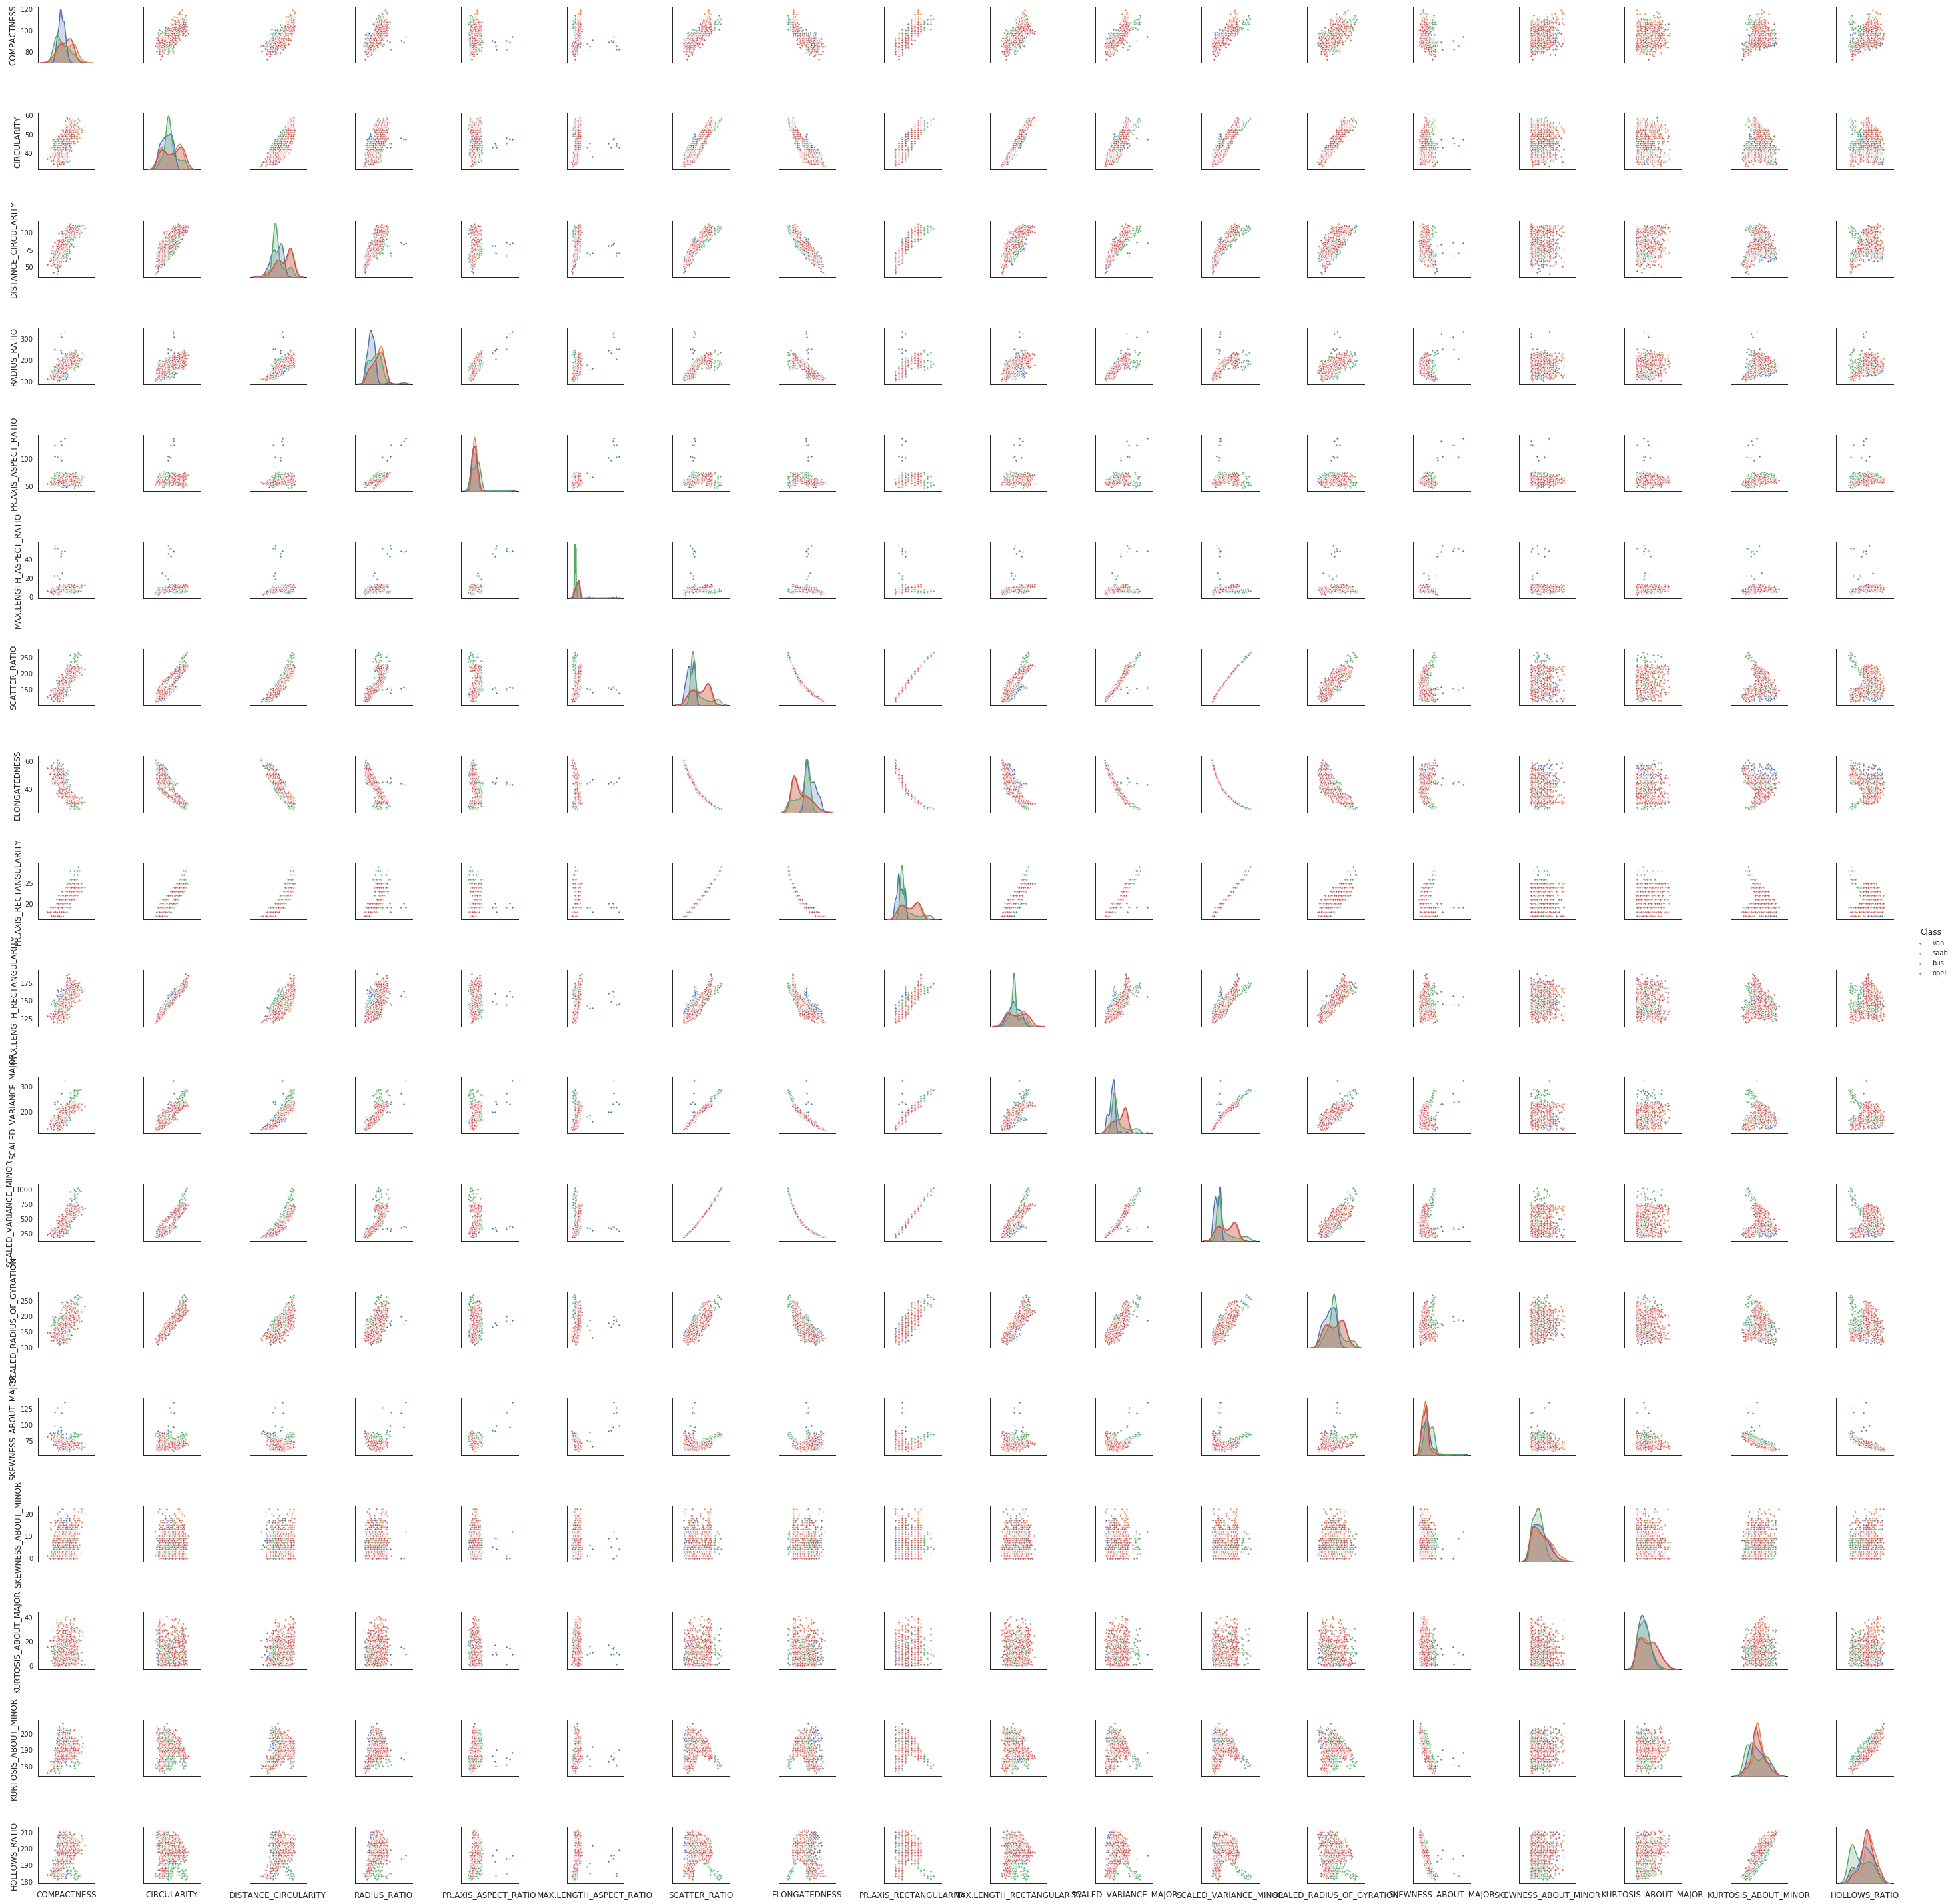

In [9]:
pp = sns.pairplot(df, hue = 'Class', palette = 'deep', height=2.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

Please double-click on the plot to get a zoomed in view.

## Correlation heatmap

Next we generate a correlation heatmap to directly inspect the correlation among features. What we observe here is that there are some features with very high correlation like ```Circularity``` and ```Scaled_radius_of_gyration```. Also, the features ```Scatter_ratio``` and ```Scaled_variance_minor``` have a correlation of exactly 1.

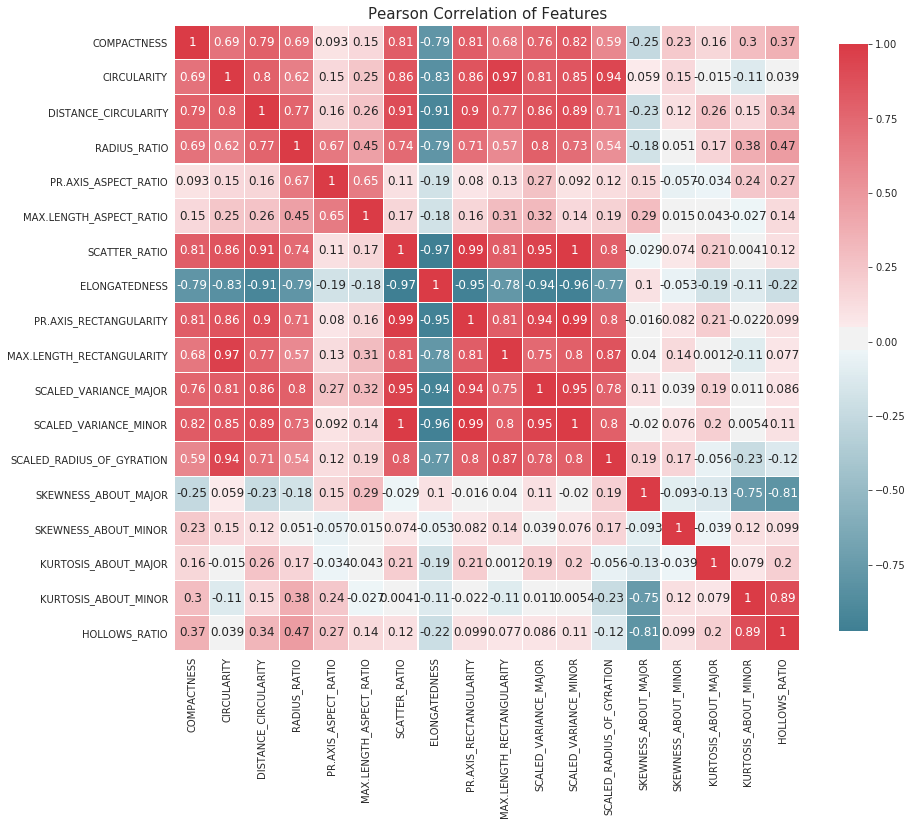

In [10]:
correlation_heatmap(df)

To further inspect the direct correlation between ```Scatter_ratio``` and ```Scaled_variance_minor```, we try to find a multiplication factor between these two.

In [11]:
mult_factor = df.SCATTER_RATIO/df.SCALED_VARIANCE_MINOR
print(mult_factor.head())
print(mult_factor.mean(), mult_factor.std())

del mult_factor  # not needed henceforth

0    0.427441
1    0.451515
2    0.325984
3    0.466019
4    0.458462
dtype: float64
0.41371349283758024 0.0779485165171334


It is somewhat evident from the small standard deviation of the multiplying factor that one feature is conclusive of the other. 

# Preprocess the data

## Convert categorical data to numeric format

This is important for the ```Class``` attribute which is to be predicted. There are 4 classes, namely ```opel```, ```bus```, ```saab``` and ```van``` and they are converted to ```0```, ```1```, ```2``` and ```3``` respectively.

The other attributes are not categorical so those need not be converted.

In [12]:
label = LabelEncoder()
df.Class = label.fit_transform(df.Class)

## Normalize the data and split it into train and test sets

An important thing to note here is that although the data is being split into train and test sets, it is currently not going to be used **for model selection** because we are using cross-validation to train our models. However, the 80-20 split is done and will be used to get **predictions** on the selected model(s).

In [13]:
X = df.drop(labels='Class', axis=1) # drop the target attribute from the X variable
y = df.Class # the target attribute to be predicted

train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_X = (train_X - train_X.mean())/train_X.std() # normalize the training data
test_X = (test_X - test_X.mean())/test_X.std() # normalize the test data

Even though we are not using this split for most part of the notebook, I feel it imperative to explain why I chose an 80-20 split. Typically, a smaller test percentage is taken when the data has little variation and when there is a lot of training data.

With the dataset we have, the variation is less but the number of samples is very less, so an 80-20 split will guarantee enough test data to give us an unbiased accuracy. More training data is always better but our data is limited and anything less than a 20% test set might make the model perform poorly against completely unseen data.

# Machine learning!!

## Machine learning algorithm (MLA) selection and initialization

Including all the algorithms I have heard of. I know about most of the frequently used ones but there are a couple of them like the Bernoulli and Gaussian Naives Bayes algorithms that I have never used before. We are currently using default parameters without tuning them.

In [14]:
MLA_dict = get_algorithms()
MLA = [clf for clf in MLA_dict.values()]

In [15]:
MLA

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=None),
 BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                   max_features=1.0, max_samples=1.0, n_estimators=10,
                   n_jobs=None, oob_score=False, random_state=None, verbose=0,
                   warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None, verbose=0,
                      warm_start=False),
 GradientBoostingClassifier(ccp_alpha=0.0, criterio



## Split dataset for cross-validation

For cross-validation, I was initially using ```ShuffleSplit```, but ```k-fold``` turned out to be a better idea, the reason being the very small size of the dataset. K-fold guarantees zero wastage of data, which is very important here.

Moreover, upon actually testing with both ```shufflesplit``` and ```k-fold```, the latter gave better results. Stratification does not make a big impact in this case (as classes are balanced) so we'll go with the unstratified version.

To add to this, since the dataset is not arranged in any specific order, shuffling should not make any difference, so we set ```shuffle``` to *False*.

Lastly, this is a very important thing that I learnt, which is that cross-validation is used only for the purpose of **model selection** (so that any ununiformity in the dataset does not affect our model), which is precisely what we are doing here. For evaluation (after obtaining the best model), we train and test it separately.

In [16]:
cv_split = model_selection.KFold(n_splits = 10)

10 splits is 90% training data and 10% test data for each fold, which is okay since the increase in the number of folds is expected to give unbiased overall results. More splits might overfit for each fold and lesser splits might not give us the optimum set of results.

## Train and run predictions on each model using cross-validation

In [17]:
MLA_compare, MLA_predict = run_models(MLA, X, y, train_X, train_y, test_X, cv_split)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.917256,0.853431,0.084060,0.004177
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.833596,0.796779,0.126443,0.874510
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.818099,0.790798,0.155841,0.113448
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.868794,0.789594,0.170586,0.139393
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.799450,0.776681,0.135640,0.006616
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.842263,0.767087,0.132991,0.078588
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.775677,0.763655,0.128649,0.004929
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.988310,0.758838,0.079943,0.779084
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.769112,0.751681,0.096983,0.010239
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",1.000000,0.750490,0.130866,0.121565


## Compare the accuracies of all the models

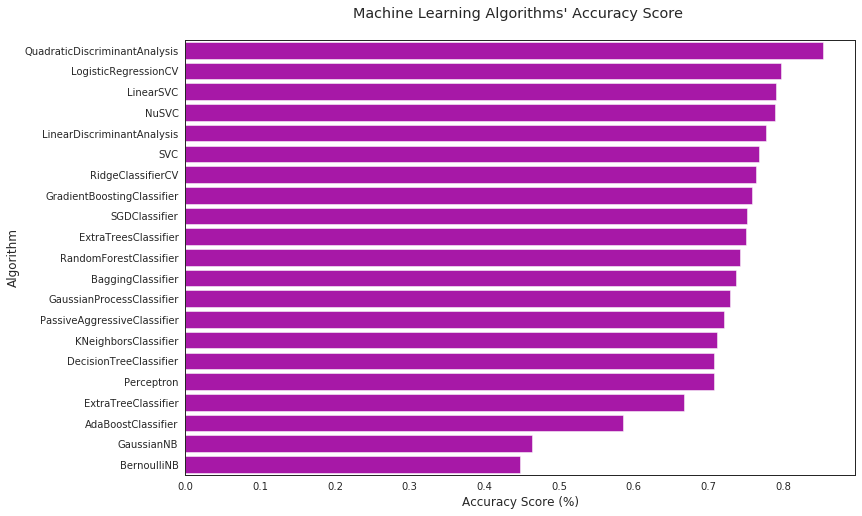

In [18]:
accuracy_barplot(MLA_compare)

To be very honest, I had a lot of expectations on the RF classifier and didn't really expect Logistic Regression to rank so well (2nd place).

I haven't had much experience with Quadratic Discriminant Analysis before but I guess this gives me enough reason to dig into it.

This was overall quite exciting to see and I will look into it to understand in depth the reason behind this in relation with this particular dataset.

## Plot the correlation among the predictions of all the models used

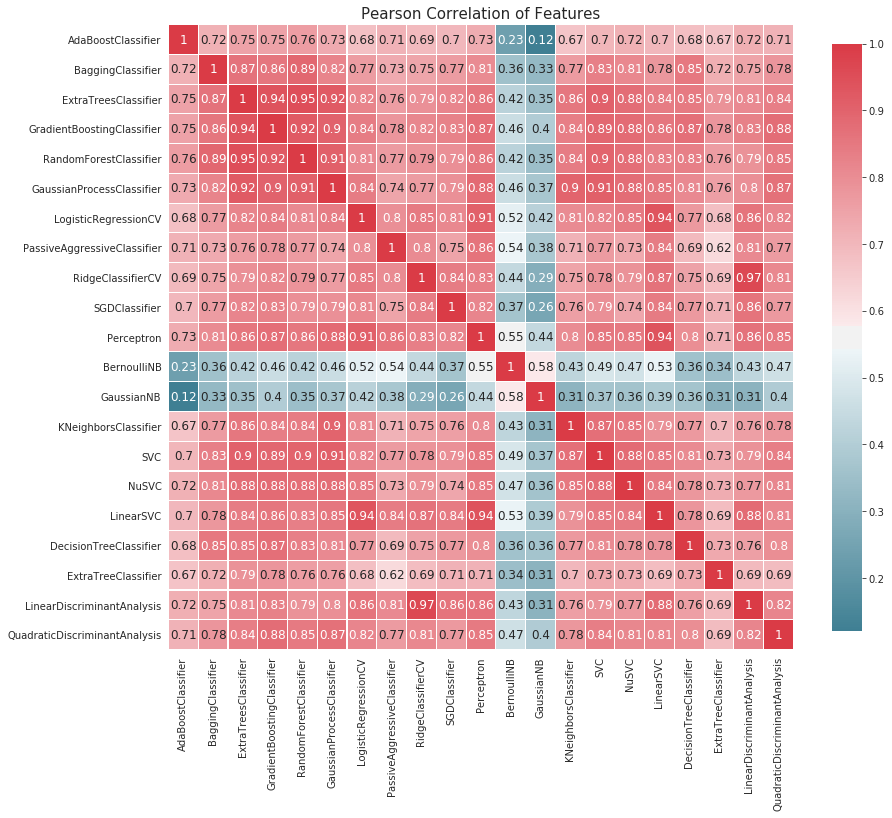

In [19]:
correlation_heatmap(MLA_predict)

We find that a few classifiers have very high (more than 90%) correlation with each other. Between each such pair, only one will be kept for the observations to be made next.

## Going a little deep with decision trees

Why decision trees? It's because they are easy to visualize and understand (although I haven't plotted the decision tree yet in this notebook).

In [20]:
_ = run_DT_model(X, y, cv_split)
del _

BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
BEFORE DT Training accuracy: 100.00
BEFORE DT Test accuracy: 70.55
BEFORE DT Test score 3*std: +/- 14.01
BEFORE DT Test accuracy (min): 63.10
----------
AFTER DT Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0, 'splitter': 'best'}
AFTER DT Training accuracy: 97.41
AFTER DT Test accuracy: 72.80
AFTER DT Test 3*std: +/- 8.51
----------


### Getting rid of unnecessary features

Let's find the attributes which have little or no correlation with the class to be predicted so that they don't confuse our decision tree anymore :)

We find and retrain on the **best** parameters with the **reduced** data set.

In [21]:
print('BEFORE DT RFE Training Shape Old: ', X.shape) 
print('BEFORE DT RFE Training Columns Old: ', X.columns.values)
print('-'*10)

dtree = tree.DecisionTreeClassifier(random_state = 42)

#reduced feature selection/extraction with cross-validation
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(X, y)

#transform X to reduced features as X_rfe and fit new model
X_rfe_cols = X.columns.values[dtree_rfe.get_support()]

print('AFTER DT RFE Training Shape New: ', df[X_rfe_cols].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe_cols)
print('-'*10)

_ = run_DT_model(X[X_rfe_cols], y, cv_split)
del dtree, _ #not needed henceforth

BEFORE DT RFE Training Shape Old:  (846, 18)
BEFORE DT RFE Training Columns Old:  ['COMPACTNESS' 'CIRCULARITY' 'DISTANCE_CIRCULARITY' 'RADIUS_RATIO'
 'PR.AXIS_ASPECT_RATIO' 'MAX.LENGTH_ASPECT_RATIO' 'SCATTER_RATIO'
 'ELONGATEDNESS' 'PR.AXIS_RECTANGULARITY' 'MAX.LENGTH_RECTANGULARITY'
 'SCALED_VARIANCE_MAJOR' 'SCALED_VARIANCE_MINOR'
 'SCALED_RADIUS_OF_GYRATION' 'SKEWNESS_ABOUT_MAJOR' 'SKEWNESS_ABOUT_MINOR'
 'KURTOSIS_ABOUT_MAJOR' 'KURTOSIS_ABOUT_MINOR' 'HOLLOWS_RATIO']
----------
AFTER DT RFE Training Shape New:  (846, 15)
AFTER DT RFE Training Columns New:  ['COMPACTNESS' 'DISTANCE_CIRCULARITY' 'PR.AXIS_ASPECT_RATIO'
 'MAX.LENGTH_ASPECT_RATIO' 'SCATTER_RATIO' 'ELONGATEDNESS'
 'MAX.LENGTH_RECTANGULARITY' 'SCALED_VARIANCE_MAJOR'
 'SCALED_VARIANCE_MINOR' 'SCALED_RADIUS_OF_GYRATION'
 'SKEWNESS_ABOUT_MAJOR' 'SKEWNESS_ABOUT_MINOR' 'KURTOSIS_ABOUT_MAJOR'
 'KURTOSIS_ABOUT_MINOR' 'HOLLOWS_RATIO']
----------
BEFORE DT Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'ma

We get rid of 8 attributes or columns by this process and manage to increase our accuracy by a small amount. This can be useful for feature engineering (though I have not tried it in this notebook yet).

## Voting classifier!!

We finally use a voting classifier to obtain the best prediction from all these classifiers.

However, it is to be noted that according to the correlation heatmap a few cells above, there were a few classifiers having very high correlation amongst themselves. We have discarded the extra ones as they would not add much value to our final prediction.

In [22]:
vote_est, vote_hard_cv, vote_soft_cv = run_voting_model(X, y, cv_split)

Hard Voting Training accuracy: 96.66
Hard Voting Test accuracy: 76.95
Hard Voting Test 3*std: +/- 12.26
----------
Soft Voting Training accuracy: 98.19
Soft Voting Test accuracy: 79.32
Soft Voting Test 3*std: +/- 10.10
----------


## Hyper-parameter tuning

We use grid search to find the best hyper-parameters for each classifier with respect to this dataset.

Note: We use all the columns and do not discard the ones we did for the Decision Tree tuning before.

### Warning: this takes a lot of time to run (12 mins on 16 threads)

For this reason, I'll be pasting the output below this in a separate cell.

In [23]:
# The slow speed is due to some specific hparams only, I will try to provide an option later
# which will freeze all those if necessary (I have frozen some by myself as it can be seen).
tune_hparams(X, y, cv_split, vote_est)

The best parameter for AdaBoostClassifier is {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 17.73 seconds.

The best parameter for BaggingClassifier is {'max_samples': 0.5, 'n_estimators': 1000, 'random_state': 0} with a runtime of 16.60 seconds.

The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 10, 'random_state': 0} with a runtime of 23.66 seconds.

The best parameter for GradientBoostingClassifier is {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 451.24 seconds.

The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 10, 'oob_score': True, 'random_state': 0} with a runtime of 43.30 seconds.

The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 12.08 seconds.

The best pa

{'ada': [{'clf__n_estimators': [10, 50, 100, 300, 1000],
   'clf__learning_rate': [0.01, 0.03, 0.05, 0.1, 0.25],
   'clf__algorithm': ['SAMME', 'SAMME.R'],
   'clf__random_state': [0]}],
 'bc': [{'clf__n_estimators': [10, 50, 100, 300, 1000],
   'clf__max_samples': [0.1, 0.25, 0.5, 0.75, 1.0],
   'clf__random_state': [0]}],
 'etc': [{'clf__n_estimators': [10, 50, 100, 300, 1000],
   'clf__criterion': ['gini', 'entropy'],
   'clf__max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'clf__random_state': [0]}],
 'gbc': [{'clf__loss': ['deviance', 'exponential'],
   'clf__learning_rate': [0.1],
   'clf__n_estimators': [300],
   'clf__criterion': ['friedman_mse', 'mse', 'mae'],
   'clf__max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'clf__random_state': [0]}],
 'rfc': [{'clf__n_estimators': [10, 50, 100, 300, 1000],
   'clf__criterion': ['gini', 'entropy'],
   'clf__max_depth': [2, 3, 4, 6, 8, 10, 12, 14, 16, None],
   'clf__oob_score': [True],
   'clf__random_state': [0]}],
 'gpc'

Took a lot of time. Phew!

### Output of the above cell (in case one doesn't run it)

```
The best parameter for AdaBoostClassifier is {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} with a runtime of 17.73 seconds.

The best parameter for BaggingClassifier is {'max_samples': 0.5, 'n_estimators': 1000, 'random_state': 0} with a runtime of 16.60 seconds.

The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 10, 'random_state': 0} with a runtime of 23.66 seconds.

The best parameter for GradientBoostingClassifier is {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 451.24 seconds.

The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 10, 'oob_score': True, 'random_state': 0} with a runtime of 43.30 seconds.

The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 12.08 seconds.

The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'} with a runtime of 116.52 seconds.

The best parameter for BernoulliNB is {'alpha': 0.1} with a runtime of 0.06 seconds.

The best parameter for GaussianNB is {} with a runtime of 0.02 seconds.

The best parameter for KNeighborsClassifier is {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'} with a runtime of 0.39 seconds.

The best parameter for SVC is {'C': 4, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'poly', 'probability': True, 'random_state': 0} with a runtime of 34.83 seconds.

The best parameter for LinearDiscriminantAnalysis is {} with a runtime of 0.03 seconds.

The best parameter for QuadraticDiscriminantAnalysis is {} with a runtime of 0.02 seconds.

Total optimization time was 11.94 minutes.
```
----------

## Voting classifier with the tuned hyper-parameters

To be kept in mind is the fact that ```vote_est``` now contains the best parameters. This, however, would be effective only when the above cell is run and the hparams are actually tuned.

But before running that we select 3 of the highest performing models instead of going for all of them. To know which ones are the best performing, I have run them individually (and it is present in the notebook further below).

**SVC could not be selected** as there is a problem running it in vote with the tuned hparams. It goes on endlessly and when the kernel is interrupted, the line where it stops is the one related to dividing work among threads (```worker.acquire()```). With n_jobs=1, it also does the same thing except that the kernel cannot even be interrupted and has to be restarted. I guess, it is related to some default timeout setting but it took me an entire day to figure out that the problem lies with SVC :)

In [24]:
top3_list = ['qda', 'lr', 'gbc']
top3_est = [clf_tuple for clf_tuple in vote_est if clf_tuple[0] in top3_list]

One thing I have kept in mind while selecting them is that there should not be a very high correlation among the three classifiers, else we will get similar predictions with each. This is the reason I haven't selected the exact top-3 and by testing multiple times I have observed that this setting gives better results.

In [25]:
top3_est

[('gbc',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=2,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=300,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=0, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False)),
 ('lr',
  LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                       fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                       max_iter=100, multi_class='auto', n_jobs=None,
                       penalty='l1', random_s

In [26]:
#Hard Vote or majority rules with Tuned Hyperparameters
grid_hard = ensemble.VotingClassifier(estimators = top3_est, voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, X, y, cv  = cv_split, return_train_score=True, n_jobs=-1)

print("Hard Voting w/Tuned Hyperparameters Training accuracy: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test accuracy: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Soft Vote or weighted probabilities with Tuned Hyperparameters
grid_soft = ensemble.VotingClassifier(estimators = top3_est, voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, X, y, cv  = cv_split, return_train_score=True, n_jobs=-1)

print("Soft Voting w/Tuned Hyperparameters Training accuracy: {:.2f}". format(grid_soft_cv['train_score'].mean()*100)) 
print("Soft Voting w/Tuned Hyperparameters Test accuracy: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Soft Voting w/Tuned Hyperparameters Test 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting w/Tuned Hyperparameters Training accuracy: 93.97
Hard Voting w/Tuned Hyperparameters Test accuracy: 81.92
Hard Voting w/Tuned Hyperparameters Test 3*std: +/- 9.79
----------
Soft Voting w/Tuned Hyperparameters Training accuracy: 95.34
Soft Voting w/Tuned Hyperparameters Test accuracy: 83.57
Soft Voting w/Tuned Hyperparameters Test 3*std: +/- 8.82
----------


We print ```grid_soft_cv``` to take a better look at the cross-validation results. To be kept in mind is that ```n_splits``` is currently set to 10.

In [27]:
grid_soft_cv

{'fit_time': array([3.12024164, 3.93613935, 3.12490535, 3.95007706, 3.12747192,
        3.11308908, 3.93614721, 3.11490083, 3.87432504, 3.18398619]),
 'score_time': array([0.00227594, 0.00225019, 0.00225616, 0.00228715, 0.00231743,
        0.00221825, 0.0022378 , 0.00229883, 0.00222468, 0.00224376]),
 'test_score': array([0.85882353, 0.84705882, 0.8       , 0.85882353, 0.82352941,
        0.78823529, 0.8452381 , 0.82142857, 0.89285714, 0.82142857]),
 'train_score': array([0.96189225, 0.94743758, 0.95400788, 0.94480946, 0.95795007,
        0.95795007, 0.95275591, 0.94356955, 0.95931759, 0.95406824])}

**We observe a clear case of overfitting which I will deal with in the upcoming days.**
**We also observe that the QDA model gives better results than the voting classifier, which is probably because we couldn't include our 2nd best model SVC.**

## Again running all the models individually but now with tuned hyper-parameters

Instead of directly using values from ```vote_est```, I have re-written this part so that running the time-consuming voting model is not required to run this.

Moreover, running this has helped me select the top 3 models for the voting classifier as well.

In [28]:
#instead of including this in the helper file, I have included it here so that directly changing the values is possible
def get_tuned_algorithms():
    MLA_tuned = [
        #Ensemble Methods
        ensemble.AdaBoostClassifier(learning_rate=0.1, n_estimators=300),
        ensemble.BaggingClassifier(max_samples=0.5, n_estimators=1000),
        ensemble.ExtraTreesClassifier(criterion='gini', max_depth=12, n_estimators=10),
        ensemble.GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, max_depth=2, n_estimators=300),
        ensemble.RandomForestClassifier(criterion='entropy', max_depth=14, n_estimators=1000, oob_score=True),

        #Gaussian Processes
        gaussian_process.GaussianProcessClassifier(max_iter_predict=10),

        #Linear models
        linear_model.LogisticRegressionCV(fit_intercept=True, penalty='l1', solver='saga'),
        linear_model.PassiveAggressiveClassifier(),
        linear_model.RidgeClassifierCV(),
        linear_model.SGDClassifier(),
        linear_model.Perceptron(),

        #Navies Bayes
        naive_bayes.BernoulliNB(alpha=0.1),
        naive_bayes.GaussianNB(),

        #Nearest Neighbour
        neighbors.KNeighborsClassifier(algorithm='auto', n_neighbors=6, weights='distance'),

        #SVM
        svm.SVC(probability=True, C=4, kernel='poly', decision_function_shape='ovo', gamma=0.1),
        svm.NuSVC(probability=True),
        svm.LinearSVC(),

        #Trees    
        tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
        tree.ExtraTreeClassifier(),

        #Discriminant Analysis
        discriminant_analysis.LinearDiscriminantAnalysis(),
        discriminant_analysis.QuadraticDiscriminantAnalysis()

        ]
    return MLA_tuned

In [29]:
MLA_tuned = get_tuned_algorithms()
MLA_compare_tuned, MLA_predict_tuned = run_models(MLA_tuned, X, y, train_X, train_y, test_X, cv_split)
MLA_compare_tuned

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
20,QuadraticDiscriminantAnalysis,"{'priors': None, 'reg_param': 0.0, 'store_cova...",0.917256,0.853431,0.084060,0.003169
14,SVC,"{'C': 4, 'break_ties': False, 'cache_size': 20...",0.926058,0.821457,0.118985,0.113258
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.831102,0.806218,0.127048,1.459512
16,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.817310,0.790798,0.155841,0.093823
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.868794,0.789594,0.170586,0.143037
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.991464,0.779034,0.122983,1.604076
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.799450,0.776681,0.135640,0.004999
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.775677,0.763655,0.128649,0.006626
7,PassiveAggressiveClassifier,"{'C': 1.0, 'average': False, 'class_weight': N...",0.749283,0.750630,0.122259,0.010260
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.000000,0.742199,0.142383,2.063762


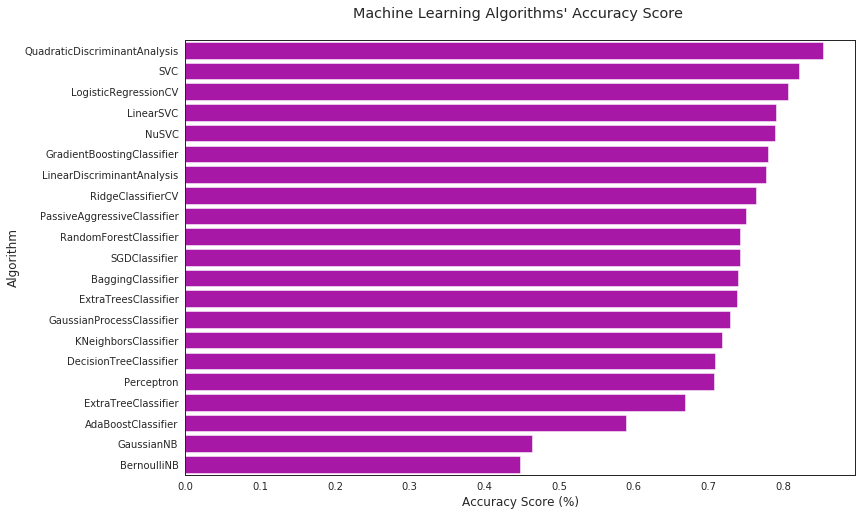

In [30]:
accuracy_barplot(MLA_compare_tuned)

We see a few changes in the top ranks when compared to the default hyper-parameters.

SVC has improved by a noticeable margin. On further investigation on how that happened, I found out that changing **gamma** from *auto* to *0.1* did the trick.

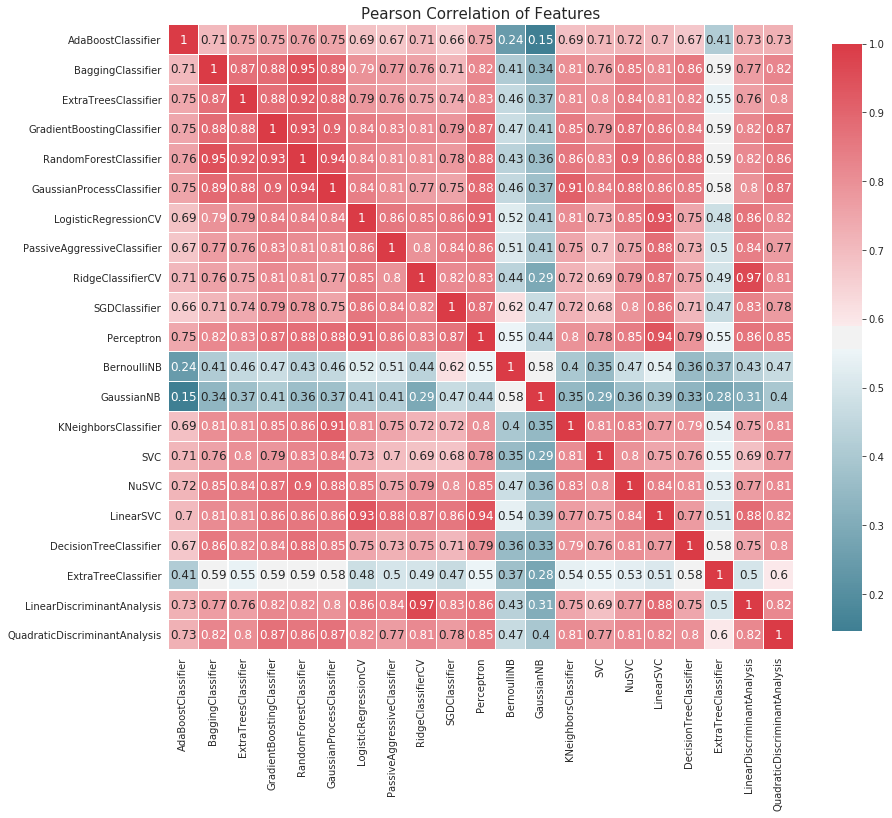

In [31]:
correlation_heatmap(MLA_predict_tuned)

It can be observed that tuned tree-based ensemble algorithms have very high correlation. QDA too has a somewhat high correlation (~0.8) with SVMs and ensemble based classifiers.

# Final results

**Best cross-validation accuracy: 85.3431%**

**Classifier: Quadratic Discriminant Analysis**

## Not over yet!

Some of the things I'll explore in the upcoming days:
* Feature engineering
* Bring the RF classifier to a modest accuracy
* Investigate why the voting model has a lower accuracy than QDA (as suggested, that's because of the low performing models, so did a voting with the top 3 classifiers only)
* Find out the issue with the tuned SVC when used for voting
* Read more about classifier selection with respect to specific dataset properties
* Better visualisation and comparison between tuned and non-tuned models
* Experiment with the other datasets keeping a similar flow
* Modularise the code better to ensure maximum re-usability as the code gets larger (I updated the code now to make it much more modularised).